In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

In [4]:
pathname="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0919 ancilla twirl FTXX45_01+10_R mapping45213/"
c_d2,circuit_count= read_circuit_file(pathname+"d=2.txt")
print (circuit_count)

c_d8,circuit_count= read_circuit_file(pathname+"d=8.txt")
print (circuit_count)

c_d16,circuit_count= read_circuit_file(pathname+"d=16.txt")
print (circuit_count)

c_d32,circuit_count= read_circuit_file(pathname+"d=32.txt")
print (circuit_count)


20
20
20
20


In [5]:
paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 FTXX45__d=2/"
# paf_data_d2_qubitsplitting="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240927/2024-09-27 2Test__d=2/"
paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 FTXX45__d=8/"
# paf_data_d8_rerun="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 FTXX45__d=8_rerun/"
paf_data_d16="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 FTXX45__d=16/"
paf_data_d32="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 FTXX45__d=32/"

filenames_d2=read_data_file(paf_data_d2)
# filenames_d2_qubitsplitting=read_data_file(paf_data_d2_qubitsplitting)
print (len(filenames_d2))
# print(filenames_d2)
# print (filenames_d2_qubitsplitting)
filenames_d4=[]
filenames_d8=read_data_file(paf_data_d8)
# filenames_d8_rerun=read_data_file(paf_data_d8_rerun)
filenames_d16=read_data_file(paf_data_d16)
filenames_d32=read_data_file(paf_data_d32)

print (len(filenames_d8))
print (len(filenames_d16))
print (len(filenames_d32))

# filenames_d16_goodgates=read_data_file("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/")

wrong
rerun
old
20
New folder
old
20
20
20


In [6]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20

a=Quantum_State(5)
a_s=Quantum_State(5)
b=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


In [7]:

filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
shots=2000
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()
# print (filenames_data)
# print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
    counts_d2.append(counts_ibm_mapping_dic)

    # b.Import(paf_data_d2_qubitsplitting+filenames_d2_qubitsplitting[i],keep_file=True)
    # print (filenames_d2_qubitsplitting[i])
    # b_traced=Trace_Out(b,[0,1,2,3])
    
    # a_s=spam1.Correct_SPAM(a)
    # data_traced_spam=Trace_Out(a_s,[0,1,2,3])
    # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
    # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
    # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced,b_traced],label=["sim_traced","data_traced","0927"])
        

2024-09-19-152500_Line_001.txt
counts: [70, 187, 18, 13, 59, 1318, 3, 36, 11, 32, 2, 7, 29, 169, 9, 37]
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+51:RY+21:FTXA450.2500+:RY+41:AZ2+1.0000:FTXA450.2500+:AZ4+1.0000:RY+51:RX+21:SKAY4+0.5000:FTXA420.2500+:SKAY4-0.5000:SKAX2-0.5000:AZ4-0.5000:SKAY5+0.5000:FTXA510.2500+:SKAY5-0.5000:SKAX1-0.5000:AZ5-0.5000:HAD4:HAD5

counts sim: [0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-152528_Line_002.txt
counts: [4, 15, 3, 6, 19, 119, 6, 29, 45, 175, 23, 11, 85, 1385, 14, 61]
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:AZ5+1.0000:RX+21:FTXA450.2500+:RY+41:AZ5+1.0000:AZ2+1.0000:FTXA450.2500+:RY+51:RY+21:SKAY4+0.5000:FTXA420.2500+:SKAY4-0.5000:SKAX2-0.5000:AZ4-0.5000:SKAY5+0.5000:FTXA510.2500+:SKAY5-0.5000:SKAX1-0.5000:AZ5-0.5000:HAD4:HAD5

counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]

In [8]:
filenames_data=[]
counts_d8=[]
counts_d8_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d8.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d8
circuit=c_d8
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d8.append(counts_ibm_mapping_dic)
    
    # b.Import(paf_data_d8_rerun+filenames_d8_rerun[i],keep_file=True)
    # b_traced=Trace_Out(b,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)

    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-19-163626_Line_001.txt
counts: [1077, 104, 66, 34, 227, 30, 30, 54, 131, 47, 78, 30, 53, 4, 22, 13]
counts sim: [2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-163707_Line_002.txt
counts: [176, 81, 16, 35, 1196, 56, 71, 38, 22, 8, 11, 15, 169, 35, 48, 23]
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-162057_Line_003.txt
counts: [979, 52, 46, 32, 416, 39, 32, 46, 161, 20, 40, 39, 67, 3, 9, 19]
counts sim: [2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-162139_Line_004.txt
counts: [20, 33, 36, 10, 39, 24, 110, 14, 24, 37, 308, 42, 106, 54, 1067, 76]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-19-162219_Line_005.txt
counts: [29, 36, 27, 218, 12, 13, 7, 59, 35, 51, 71, 1105, 26, 18, 61, 232]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0]
2024-09-19-162301_Line_006.txt
counts: [59, 133, 29, 19, 62, 1183, 24, 76, 14, 41, 5, 15, 34, 211, 16, 79]
counts sim: [0, 0, 0, 0, 0, 2000, 0, 

In [9]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
shots=2000
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-19-164108_Line_001.txt
counts: [73, 134, 225, 805, 25, 52, 53, 179, 69, 138, 45, 85, 24, 41, 16, 36]
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-164209_Line_002.txt
counts: [74, 259, 60, 51, 104, 917, 49, 175, 19, 23, 16, 17, 31, 115, 31, 59]
counts sim: [0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-164311_Line_003.txt
counts: [27, 41, 142, 76, 80, 113, 835, 71, 13, 16, 62, 37, 60, 57, 330, 40]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-164414_Line_004.txt
counts: [35, 50, 154, 51, 134, 37, 774, 112, 23, 19, 81, 30, 52, 49, 325, 74]
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-164518_Line_005.txt
counts: [23, 43, 24, 27, 45, 215, 63, 59, 72, 187, 36, 24, 93, 950, 38, 101]
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-19-164620_Line_006.txt
counts: [62, 83, 68, 720, 69, 28, 73, 184, 59, 82, 53, 319, 55, 21, 44, 80]
counts sim: [0, 0, 0, 2000, 0,

In [10]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-19-195355_Line_001.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-19-165342_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-19-195755_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-195945_Line_004.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-170051_Line_005.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-19-170251_Line_006.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-170450_Line_007.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-200846_Line_008.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-170949_Line_009.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0]
2024-09-19-172347_Line_010.txt
counts sim: [0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-19-172543_Line_011.txt
counts sim: [0, 0, 

In [11]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0919 ancilla twirl FTXX45_01+10_R mapping45213/7419898e-4f7c-4c05-9ba4-37bb045a8497FTXX45_01+10_ancilla_error_meas_expli_09192024_R", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
# print (picklefile)
# print (b)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_2 = pickle.load(fp)
# print (picklefile)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_3 = pickle.load(fp)
# print (picklefile)


C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [12]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [13]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [14]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB_01(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

print (eab_result)


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.704, 0.799, 0.853, 0.74, 0.711, 0.666, 0.809, 0.81, 0.583, 0.703, 0.873, 0.855, 0.826, 0.786, 0.731, 0.654, 0.907, 0.818, 0.822, 0.749], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.622, 0.669, 0.642, 0.714, 0.599, 0.585, 0.734, 0.59, 0.668, 0.734, 0.726, 0.493, 0.493, 0.712, 0.668, 0.757, 0.701, 0.789, 0.756, 0.596], 16: [0.546, 0.689, 0.385, 0.347, 0.501, 0.287, 

In [15]:
raw_fidelity_list = eab_result["fidelity_list"]
data_save_path="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/FTXX45 middleionidle 0919 EAB-XX with anc twirl/"
s=19

# depth=[2,8,16]
# bootstrap_N_save(s,depth,raw_fidelity_list,data_save_path,pauli_request_list,nqubit)
    
# depth=[8,16,32]
# bootstrap_N_save(s,depth,raw_fidelity_list,data_save_path,pauli_request_list,nqubit)

depth=[2,8,16,32]
bootstrap_N_save(s,depth,raw_fidelity_list,data_save_path,pauli_request_list,nqubit)


Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.04728889803364722
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0370337 0.0036049
YI 0.0454474 0.0035
ZI 0.0306917 0.0020541
IX 0.0383421 0.0042005
XX 0.067144 0.0051239
YX 0.069141 0.0045597
ZX 0.057394 0.0045299
IY 0.0470618 0.0047664
XY 0.066691 0.0052079
YY 0.0751453 0.0047456
ZY 0.0618924 0.0052486
IZ 0.0265773 0.0025038
XZ 0.0508959 0.0041764
YZ 0.0541073 0.0039206
ZZ 0.0290574 0.0027905


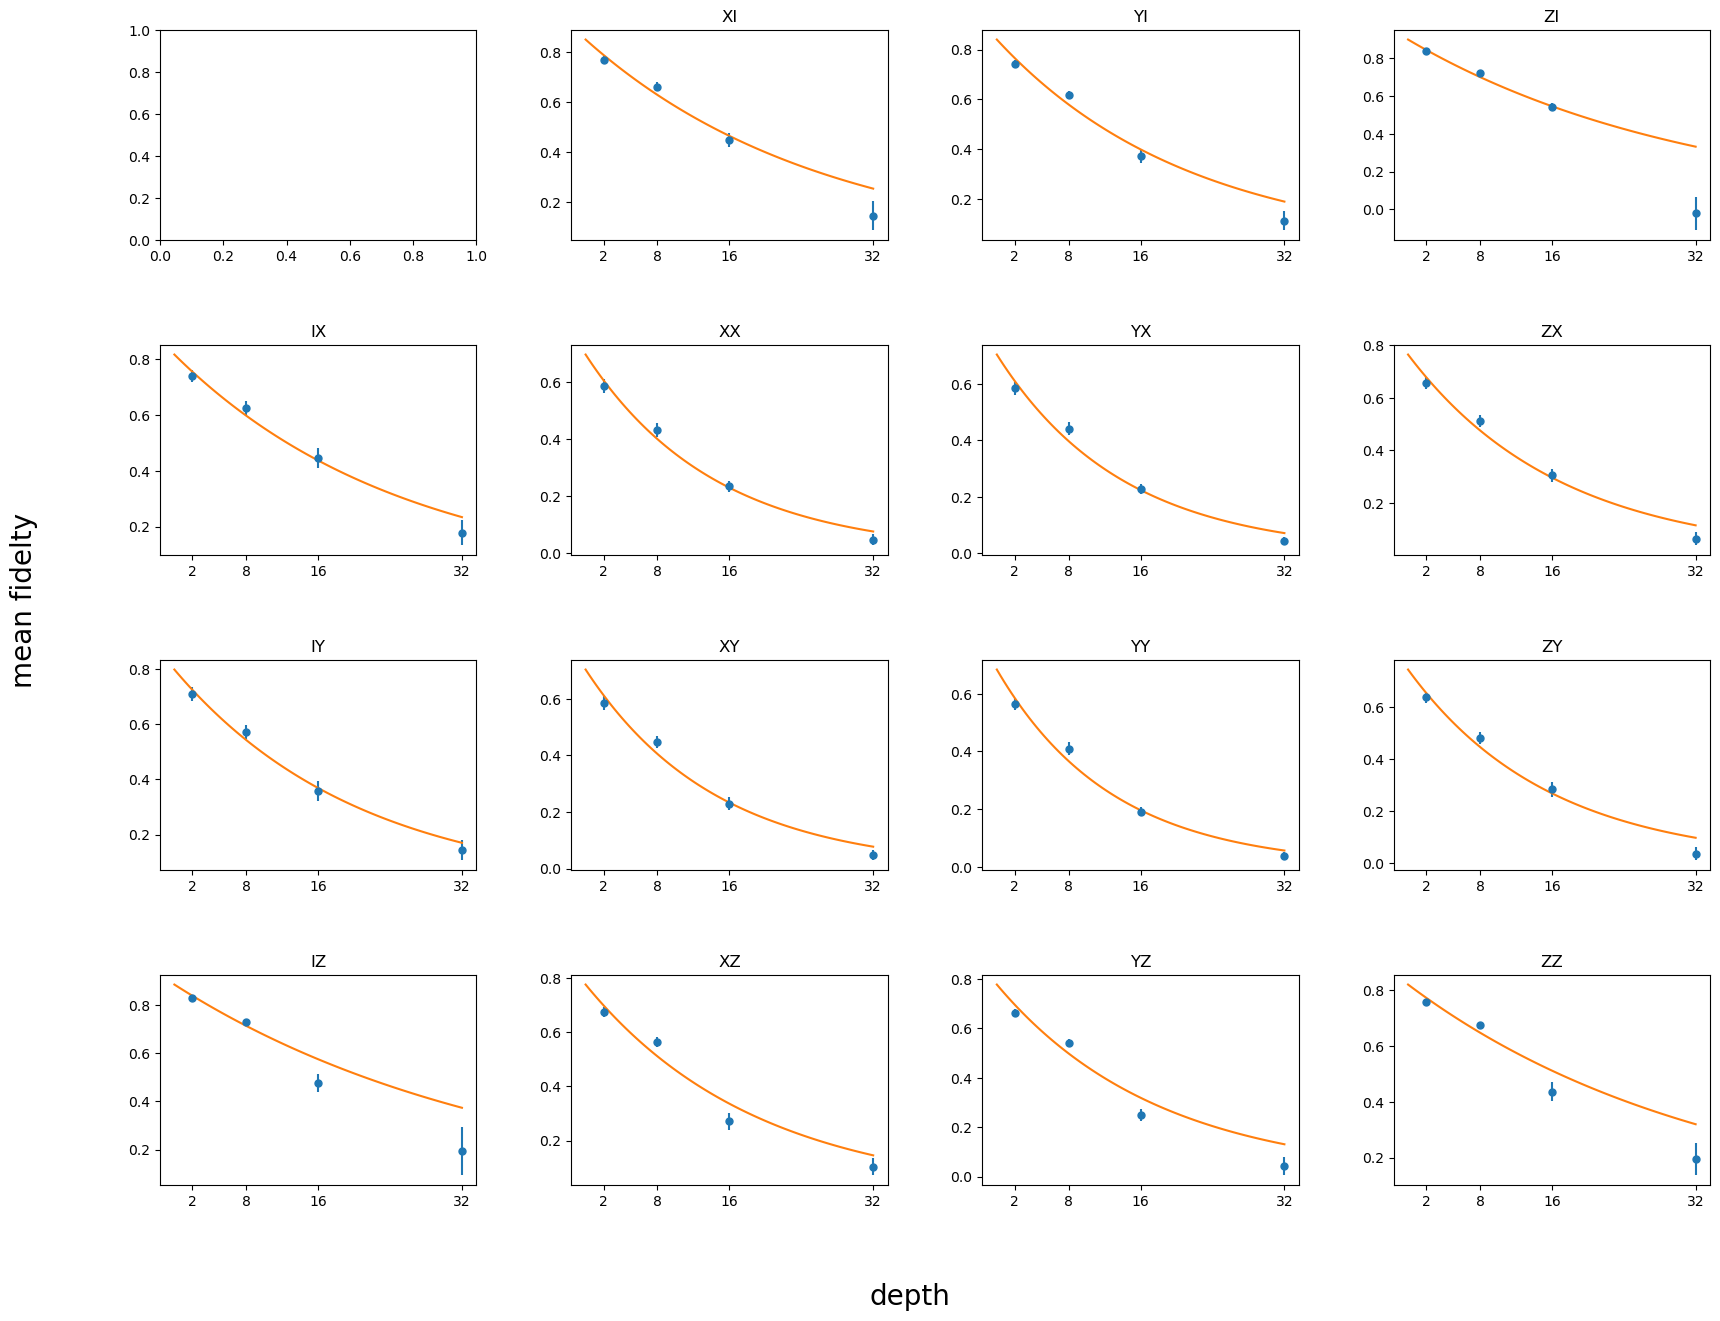

In [16]:
depth=[2,8,16,32]
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
fidelity_list = {}
stdev_list = {}
a_full_dic={}
Y_full_dic={}
Yerr_full_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a_full_dic[pauli_label]=a 
        Y_full_dic[pauli_label]=Y
        Yerr_full_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
# shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]


plot_full={}
plot_full=deepcopy(plot_dic)
err_full=deepcopy(error_dic)
# print (Y_full_dic)

x_c=np.linspace(0,32,num=80)
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
            pass
        else:
            axs[i, j].set_xticks(depth)   
            axs[i, j].errorbar(depth,Y_full_dic[pauli_label], yerr=Yerr_full_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a_full_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])

In [17]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9527111
XI 0.0055707
YI 0.0028111
ZI 0.0109118
IX 0.0041397
XX 0.0019486
YX 0.0021055
ZX 0.0006305
IY 0.0017935
XY 0.0022281
YY 0.0007707
ZY -0.0003279
IZ 0.0130626
XZ 2.89e-05
YZ -0.0001178
ZZ 0.0017329


# error mitigation : mitigate ancilla error 

In [18]:
pauli_fidelity_anc_square=np.load("II_fidelity_FTXX45_0919.npy",allow_pickle=True)
pauli_fidelity_anc_square=pauli_fidelity_anc_square.item()
print (pauli_fidelity_anc_square)
mitigated_eab_fidelity = EAB_error_mitigation(fidelity_list,pauli_fidelity_anc_square)

{'II': 1.0, 'IX': 0.9615686648564005, 'IY': 0.9569950361907761, 'IZ': 0.9839098182530774, 'XI': 0.9608604700237674, 'XX': 0.9317638445410165, 'XY': 0.9267236501635161, 'XZ': 0.9457466301378175, 'YI': 0.9607528864128099, 'YX': 0.9301933100301297, 'YY': 0.9251836975845915, 'YZ': 0.9454692397113357, 'ZI': 0.9931785442615343, 'ZX': 0.9554086760218727, 'ZY': 0.9516934510220234, 'ZZ': 0.9774841402587197}


In [19]:
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], mitigated_eab_fidelity[pauli_label])

II 1.0
XI 0.9820214020836674
YI 0.9757644787709352
ZI 0.9772018596158004
IX 0.9810484271451678
XX 0.9664106178964307
YX 0.9669606386717822
ZX 0.9692656449311231
IY 0.9722072867971479
XY 0.9676957523981176
YY 0.961522627820891
ZY 0.9647814165661366
IZ 0.9767598513193565
XZ 0.9710000345167613
YZ 0.9696016382548657
ZZ 0.9820615087269117


In [20]:
pauli_fidelity_anc=deepcopy(pauli_fidelity_anc_square)
for pauli in pauli_fidelity_anc:
    pauli_fidelity_anc[pauli]=np.sqrt(pauli_fidelity_anc[pauli])
    # print (pauli)
print(pauli_fidelity_anc)

{'II': 1.0, 'IX': 0.9805960763007369, 'IY': 0.9782612310578275, 'IZ': 0.9919222843817339, 'XI': 0.9802349055322236, 'XX': 0.9652791536861326, 'XY': 0.9626648690814037, 'XZ': 0.9724950540428561, 'YI': 0.980180027552495, 'YX': 0.964465297473232, 'YY': 0.9618646981694419, 'YZ': 0.9723524256725725, 'ZI': 0.9965834356748733, 'ZX': 0.9774500887625274, 'ZY': 0.9755477697283836, 'ZZ': 0.9886779760158105}


In [21]:
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], pauli_fidelity_anc[pauli_label])

II 1.0
XI 0.9805960763007369
YI 0.9782612310578275
ZI 0.9919222843817339
IX 0.9802349055322236
XX 0.9652791536861326
YX 0.9626648690814037
ZX 0.9724950540428561
IY 0.980180027552495
XY 0.964465297473232
YY 0.9618646981694419
ZY 0.9723524256725725
IZ 0.9965834356748733
XZ 0.9774500887625274
YZ 0.9755477697283836
ZZ 0.9886779760158105


In [22]:
error_list = fidelity_to_error(pauli_fidelity_anc,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))

Label / Pauli error rates
II 0.978036
XI 0.0025627
YI 0.0013812
ZI 0.0072698
IX 0.0008957
XX 3.32e-05
YX -2.26e-05
ZX -3.84e-05
IY 0.0006693
XY 4.24e-05
YY -9.9e-06
ZY 0.0001386
IZ 0.0080939
XZ -3.51e-05
YZ 8.71e-05
ZZ 0.0008963


In [23]:
# load 2023 05 FTXX 13 data
pathname="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/for plotting/"
subdir="FTXX13_EAB_00+11_05162023"
possible_depths=["d248"]
alpha_detail_FTXX13_EAB={}
for dir in os.listdir(pathname):
    # print (os.listdir(pathname))
    if (dir.find(subdir)!=-1):
        # with open(pathname+subdir, "rb") as fp:   # Unpickling
        #     EAB_middleionidle_alpha_detail_d28 = pickle.load(fp)
        # print ("here")
        for file in os.listdir(pathname+subdir+"/"):
            filename = os.fsdecode(file)
            for depth in possible_depths:
                if (filename.find(depth)!=-1):
                    with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                        alpha_detail_FTXX13_EAB["alpha_detail_"+depth]=pickle.load(fp)
                        # print ("loaded")
                else:
                    continue
    else:
        continue




#Full set EAB FTXX45 middle ion idle 03052024 using new FTXX45 solution
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="FTXX45 middleionidle 0305"
possible_depths=["d281632"]
alpha_detail_FTXX45_NewSolution_0305_EAB={}
alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

# 05/14-05/16/2024 full set of CB data for FTXX45 (05142024 solution) d=[2,8,16,32]
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="CB_FTXX45_052024"
possible_depths=["d281632"]
alpha_detail_FTXX45_0514Solution_05162024_CB={}
alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0514Solution_05162024_CB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

    # 0927-09/30/2024 full set of CB data for FTXX45  d=[2,8,32]
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="CB_FTXX45_0927"
possible_depths=["d2832"]
alpha_detail_FTXX45_09272024_CB={}
alpha_detail_FTXX45_09272024_CB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_09272024_CB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_09272024_CB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        # continue
                        alpha_detail_FTXX45_09272024_CB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_09272024_CB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

# 0930-1001/2024 full set of EAB data for FTXX45  d=[2,8,16, 32] middle ion idle
pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="FTXX45 middleionidle 1001"
possible_depths=["d281632"]
alpha_detail_FTXX45_10012024_EAB={}
alpha_detail_FTXX45_10012024_EAB_errorbar={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_10012024_EAB["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_10012024_EAB["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        # continue
                        alpha_detail_FTXX45_10012024_EAB_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_10012024_EAB_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="FTXX45 middleionidle 1001 with rerun"
possible_depths=["d281632"]
alpha_detail_FTXX45_10012024_EAB_rerun={}
alpha_detail_FTXX45_10012024_EAB_rerun_errorbar={}
# alpha_detail_EAB_temp={}
# alpha_detail_EAB_temp={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_10012024_EAB_rerun["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_10012024_EAB_rerun["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        # continue
                        alpha_detail_FTXX45_10012024_EAB_rerun_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_10012024_EAB_rerun_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

pathname="/Users/yzhu/yzhu_work/gates projects/EAB/data/for plotting/bootstrap19samples/"
subdir="FTXX45 middleionidle 0919 EAB-XX with anc twirl"
possible_depths=["d281632"]
alpha_detail_FTXX45_0919_EAB_anc_twril={}
alpha_detail_FTXX45_0919_EAB_anc_twril_errorbar={}
# alpha_detail_EAB_temp={}
# alpha_detail_EAB_temp={}
for dir in os.listdir(pathname):
    # print (dir)
    if (dir.find(subdir)!=-1):
        print ("found")
        for file in os.listdir(pathname+subdir):
            filename = os.fsdecode(file)
            print (filename)
            for depths in possible_depths:
                if (filename.find(depths)!=-1):
                    if (filename.find("_error")==-1):
                        alpha_detail_FTXX45_0919_EAB_anc_twril["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0919_EAB_anc_twril["alpha_detail_"+depths]=pickle.load(fp)
                    else:
                        # continue
                        alpha_detail_FTXX45_0919_EAB_anc_twril_errorbar["alpha_detail_"+depths]={}
                        with open(pathname+subdir+"/"+filename, "rb") as fp:   # Unpickling
                            alpha_detail_FTXX45_0919_EAB_anc_twril_errorbar["alpha_detail_"+depths]=pickle.load(fp)
                else:
                    continue
    else:
        continue

found
alpha_error_detail_d281632
alpha_detail_d81632
alpha_detail_d2816
alpha_error_detail_d81632
alpha_detail_d281632
alpha_error_detail_d2816
found
CB_alpha_detail_d281632_error
CB_alpha_detail_d81632
.DS_Store
CB_alpha_detail_d2816
CB_alpha_detail_d281632
CB_alpha_detail_d81632_error
CB_alpha_detail_d2816_error
found
CB_alpha_detail_d2832
CB_alpha_detail_d2832_error
found
alpha_error_detail_d281632
alpha_detail_d281632
found
alpha_error_detail_d281632
alpha_detail_d281632
found
alpha_error_detail_d281632
.DS_Store
alpha_detail_d281632
found
alpha_error_detail_d281632
alpha_detail_d281632


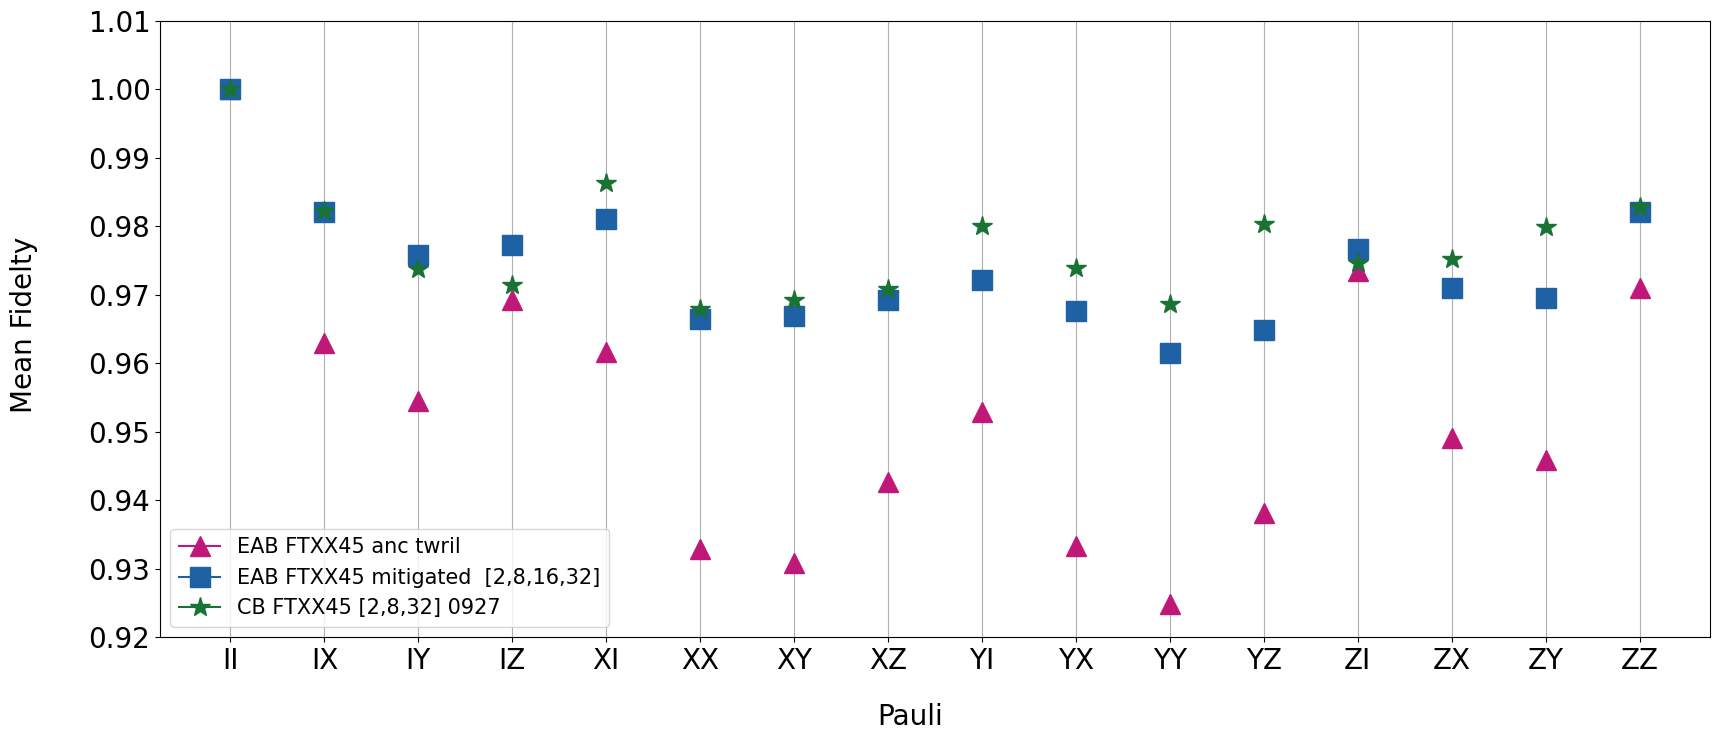

In [24]:
#plot  alpha_detail vs. depth
import seaborn as sns
from matplotlib.lines import Line2D
nqubit=2
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full
CB_pauli_request_list=pauli_request_list
# CB_pauli_request_list=["XX","IX","XI","IZ","XZ","IY","XY","YY"]
# CB_pauli_request_list=["IX","XI","XX"] #since CB circuits were generated incorrectedly, the rest of the pauli channels can't be calculated
pal = sns.color_palette("PRGn",10)
pal1 = sns.color_palette("PiYG",10)
pal2 = sns.color_palette("RdBu",10)

fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 20})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')

plt.plot(pauli_request_list,[fidelity_list[pauli_label] for pauli_label in pauli_request_list],"^",color=pal1[0],markersize=15,label='FTXX45 anc twril 09192024')
plt.plot(pauli_request_list,[mitigated_eab_fidelity[pauli_label] for pauli_label in pauli_request_list],"s",color=pal2[9],markersize=15,label='FTXX45 mitigated 09192024')
# plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='EAB FTXX45 03052024')
# plt.plot(pauli_request_list,[np.mean(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[7],markersize=15,label='CB FTXX23 ')
# plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 052024')
plt.plot(CB_pauli_request_list,[np.mean(alpha_detail_FTXX45_09272024_CB["alpha_detail_d2832"][pauli_label]) for pauli_label in CB_pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 0927')
plt.grid(axis="x")

legend_elements = [
        
                   Line2D([0], [0], marker='^', color=pal1[0], label='EAB FTXX45 anc twril',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], marker='s', color=pal2[9], label='EAB FTXX45 mitigated  [2,8,16,32]',markerfacecolor=pal2[9], markersize=15) ,  
                  #  Line2D([0], [0], marker='.', color=pal[1], label='EAB FTXX45 03052024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15),  
                #    Line2D([0], [0], marker='*', color=pal[7], label='CB FTXX23 [2,8,32]',markerfacecolor=pal[7], markersize=15),
                   Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32] 0927',markerfacecolor=pal[9], markersize=15)
                    
                  ]
plt.ylim([0.92,1.01])
plt.legend(handles=legend_elements, loc='lower left',fontsize=15)
# fname="comparison.pdf"
# fidelity_list={}
# stdev_list={}

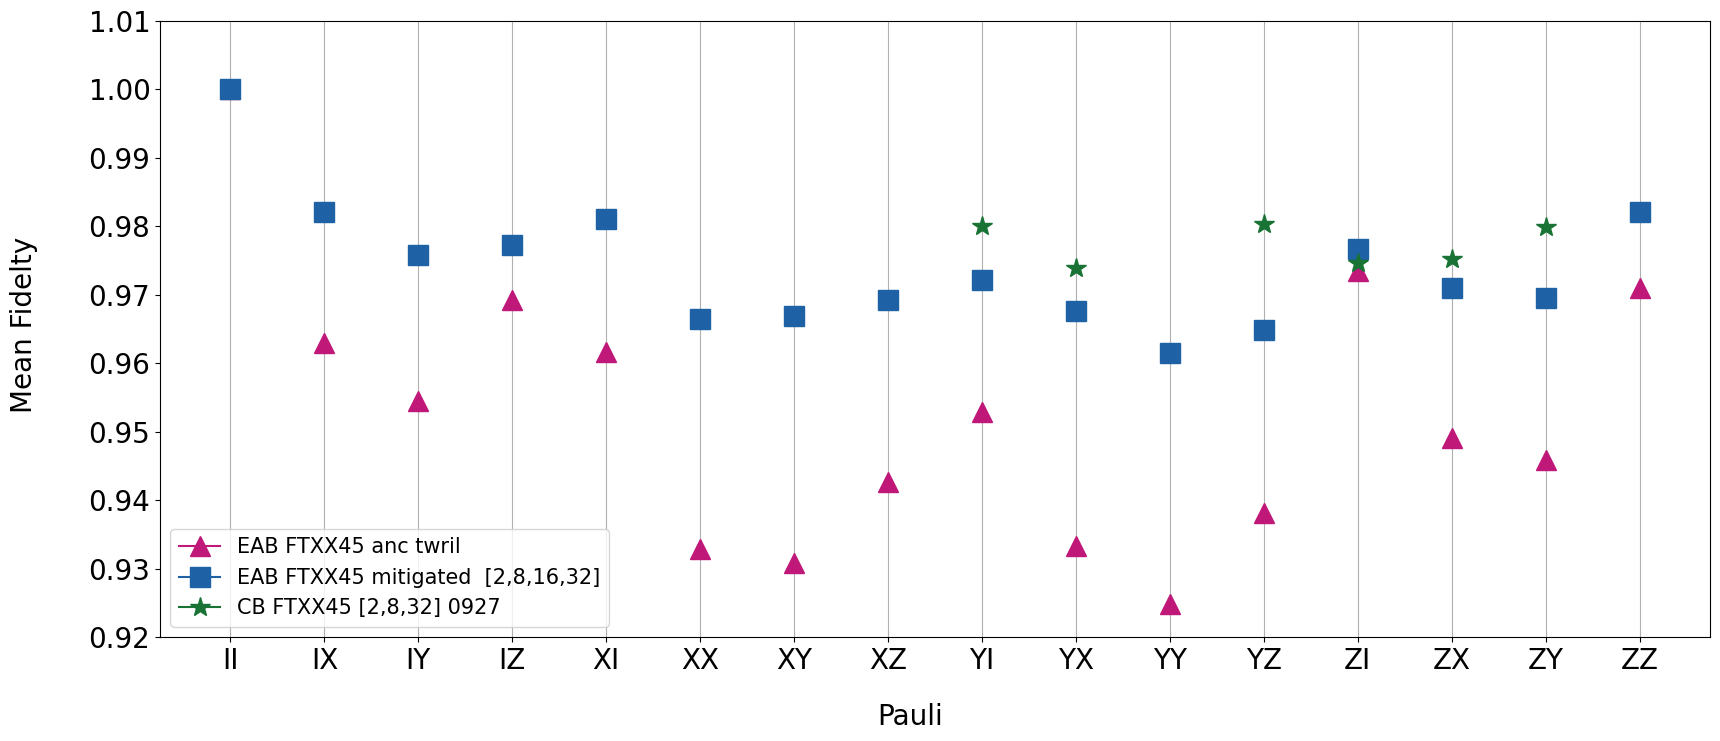

In [25]:
CB_pauli_request_list=["YX","YI","YZ","ZX","ZI","ZY"]

fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 20})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')

plt.plot(pauli_request_list,[fidelity_list[pauli_label] for pauli_label in pauli_request_list],"^",color=pal1[0],markersize=15,label='FTXX45 anc twril 09192024')
plt.plot(pauli_request_list,[mitigated_eab_fidelity[pauli_label] for pauli_label in pauli_request_list],"s",color=pal2[9],markersize=15,label='FTXX45 mitigated 09192024')
# plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='EAB FTXX45 03052024')
# plt.plot(pauli_request_list,[np.mean(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[7],markersize=15,label='CB FTXX23 ')
# plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 052024')
plt.plot(CB_pauli_request_list,[np.mean(alpha_detail_FTXX45_09272024_CB["alpha_detail_d2832"][pauli_label]) for pauli_label in CB_pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 0927')
plt.grid(axis="x")

legend_elements = [
        
                   Line2D([0], [0], marker='^', color=pal1[0], label='EAB FTXX45 anc twril',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], marker='s', color=pal2[9], label='EAB FTXX45 mitigated  [2,8,16,32]',markerfacecolor=pal2[9], markersize=15) ,  
                  #  Line2D([0], [0], marker='.', color=pal[1], label='EAB FTXX45 03052024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15),  
                #    Line2D([0], [0], marker='*', color=pal[7], label='CB FTXX23 [2,8,32]',markerfacecolor=pal[7], markersize=15),
                   Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32] 0927',markerfacecolor=pal[9], markersize=15)
                    
                  ]
plt.ylim([0.92,1.01])
plt.legend(handles=legend_elements, loc='lower left',fontsize=15)
# fname="comparison.pdf"
# fidelity_list={}
# stdev_list={}

(0.92, 1.01)

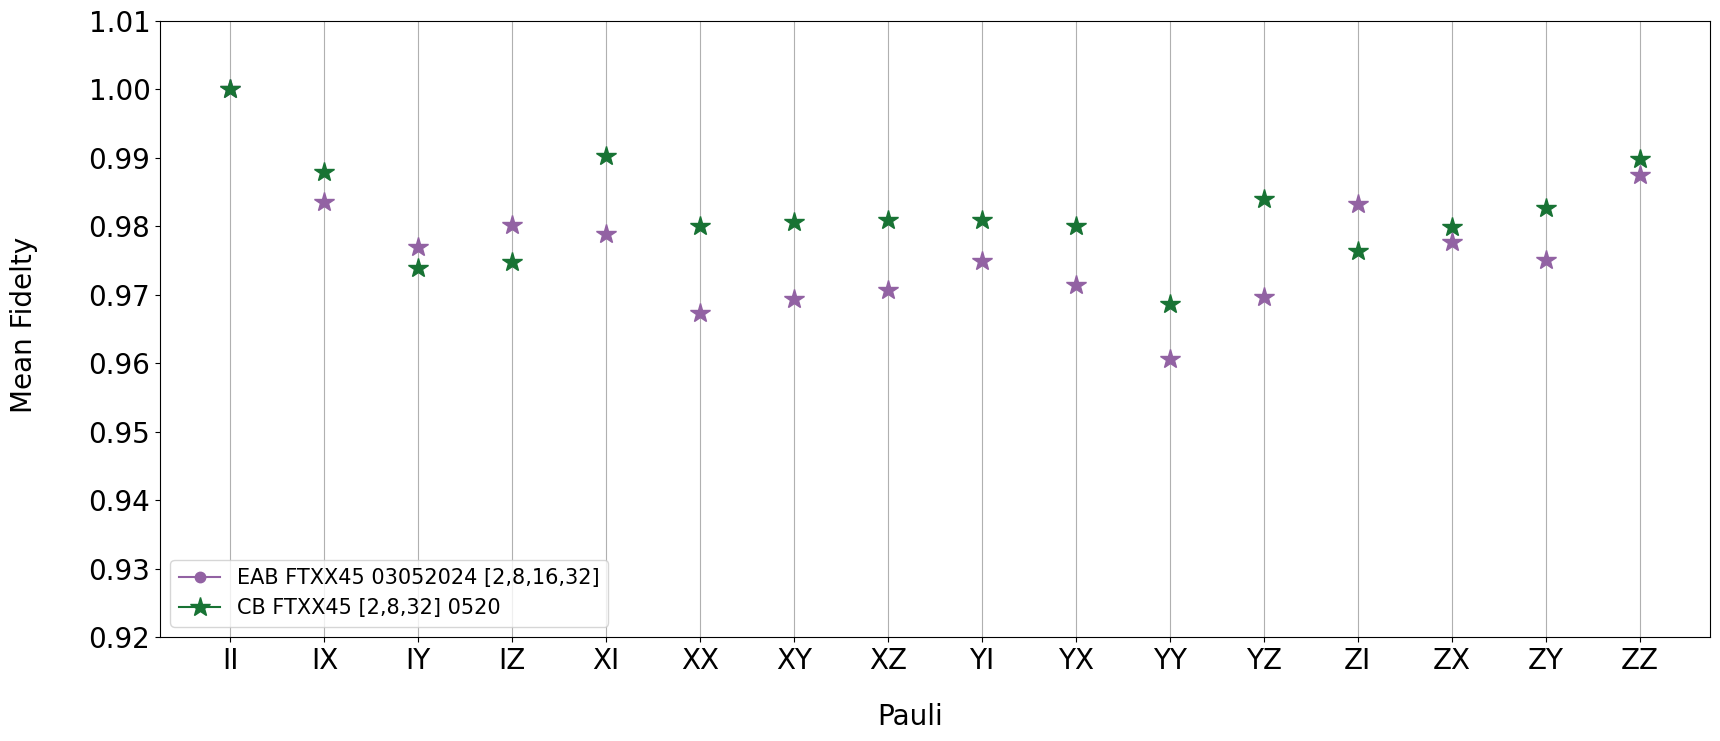

In [26]:
fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 20})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')

# plt.plot(pauli_request_list,[fidelity_list[pauli_label] for pauli_label in pauli_request_list],"^",color=pal1[0],markersize=15,label='FTXX45 anc twril 09192024')
# plt.plot(pauli_request_list,[mitigated_eab_fidelity[pauli_label] for pauli_label in pauli_request_list],"s",color=pal2[9],markersize=15,label='FTXX45 mitigated 09192024')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='EAB FTXX45 03052024')
# plt.plot(pauli_request_list,[np.mean(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[7],markersize=15,label='CB FTXX23 ')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 052024')
# plt.plot(CB_pauli_request_list,[np.mean(alpha_detail_FTXX45_09272024_CB["alpha_detail_d2832"][pauli_label]) for pauli_label in CB_pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 0927')
plt.grid(axis="x")

legend_elements = [
        
                #    Line2D([0], [0], marker='^', color=pal1[0], label='EAB FTXX45 anc twril',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                #    Line2D([0], [0], marker='s', color=pal2[9], label='EAB FTXX45 mitigated  [2,8,16,32]',markerfacecolor=pal2[9], markersize=15) ,  
                
                   Line2D([0], [0], marker='.', color=pal[1], label='EAB FTXX45 03052024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15),  
                   Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32] 0520',markerfacecolor=pal[9], markersize=15),
                #    Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32] 0927',markerfacecolor=pal[9], markersize=15)
                    
                  ]

plt.legend(handles=legend_elements, loc='lower left',fontsize=15)
plt.ylim([0.92,1.01])
# fname="comparison.pdf"


(0.92, 1.01)

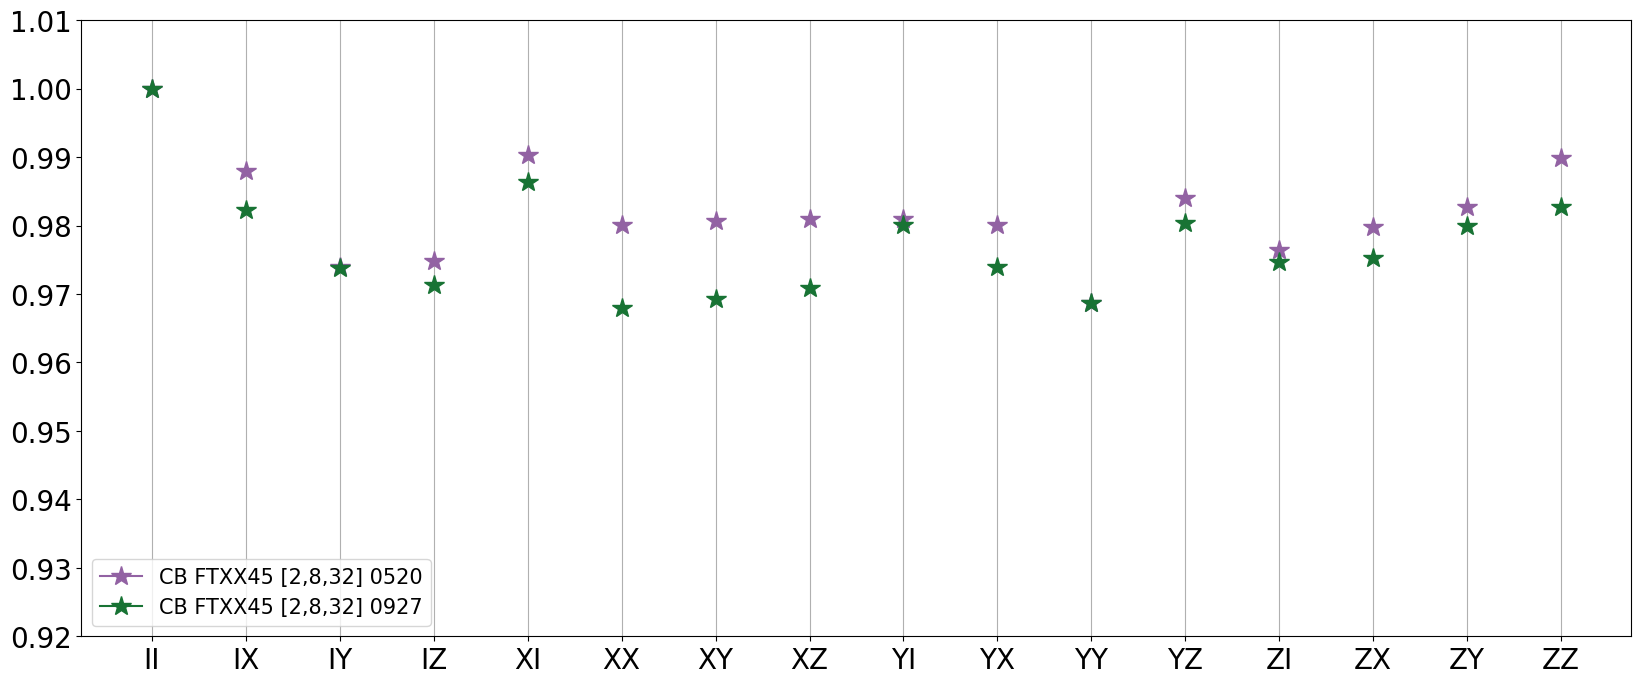

In [27]:
ig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 20})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')

# plt.plot(pauli_request_list,[fidelity_list[pauli_label] for pauli_label in pauli_request_list],"^",color=pal1[0],markersize=15,label='FTXX45 anc twril 09192024')
# plt.plot(pauli_request_list,[mitigated_eab_fidelity[pauli_label] for pauli_label in pauli_request_list],"s",color=pal2[9],markersize=15,label='FTXX45 mitigated 09192024')
# plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_NewSolution_0305_EAB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='EAB FTXX45 03052024')
# plt.plot(pauli_request_list,[np.mean(CB_alpha_detail_d2832[pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[7],markersize=15,label='CB FTXX23 ')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_0514Solution_05162024_CB["alpha_detail_d281632"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[1],markersize=15,label='CB FTXX45 052024')
plt.plot(pauli_request_list,[np.mean(alpha_detail_FTXX45_09272024_CB["alpha_detail_d2832"][pauli_label]) for pauli_label in pauli_request_list],"*",color=pal[9],markersize=15,label='CB FTXX45 0927')
plt.grid(axis="x")

legend_elements = [
        
                #    Line2D([0], [0], marker='^', color=pal1[0], label='EAB FTXX45 anc twril',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                #    Line2D([0], [0], marker='s', color=pal2[9], label='EAB FTXX45 mitigated  [2,8,16,32]',markerfacecolor=pal2[9], markersize=15) ,  
                
                #    Line2D([0], [0], marker='.', color=pal[1], label='EAB FTXX45 03052024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15),  
                   Line2D([0], [0], marker='*', color=pal[1], label='CB FTXX45 [2,8,32] 0520',markerfacecolor=pal[1], markersize=15),
                   Line2D([0], [0], marker='*', color=pal[9], label='CB FTXX45 [2,8,32] 0927',markerfacecolor=pal[9], markersize=15)
                    
                  ]

plt.legend(handles=legend_elements, loc='lower left',fontsize=15)
plt.ylim([0.92,1.01])
# fname="comparison.pdf"


In [31]:

deg_pairs_dic={
  "XY": "IZ",
  "IZ": "XY",
  "YX": "ZI",
  "ZI": "YX",
  "XZ": "IY",
  "IY": "XZ",
  "ZX": "YI",
  "YI": "ZX",
}

EAB_plot_dic={}
EAB_plot_errorbar_dic={}
EAB_msqrt={}
EAB_msqrt_errorbar={}

temp=[]
pauli_request_list_temp=pauli_request_list.copy()
deg_pairs_dic_temp=deg_pairs_dic.copy()
for pauli in pauli_request_list:
# print (pauli)
    if pauli in deg_pairs_dic_temp.keys():
        new_key="{"+pauli+","+deg_pairs_dic_temp[pauli]+"}"
        print (new_key)
        EAB_plot_dic[new_key]= np.sqrt(mitigated_eab_fidelity[pauli]*mitigated_eab_fidelity[deg_pairs_dic_temp[pauli]])
        # EAB_plot_errorbar_dic[new_key]=0.5*(mean(alpha_detail_errorbar[alpha_detail_depth][pauli])/mean(alpha_detail[alpha_detail_depth][pauli])+mean(alpha_detail_errorbar[alpha_detail_depth][deg_pairs_dic_temp[pauli]])/mean(alpha_detail[alpha_detail_depth][deg_pairs_dic_temp[pauli]]))*EAB_plot_dic[new_key]
        
        EAB_msqrt[pauli]=EAB_plot_dic[new_key]
        EAB_msqrt[deg_pairs_dic_temp[pauli]]=EAB_plot_dic[new_key]
        # EAB_msqrt_errorbar[pauli]=EAB_plot_errorbar_dic[new_key]
        # EAB_msqrt_errorbar[deg_pairs_dic_temp[pauli]]=EAB_plot_errorbar_dic[new_key]

        temp.append(deg_pairs_dic_temp[pauli])
        deg_pairs_dic_temp.pop(deg_pairs_dic_temp[pauli])
        deg_pairs_dic_temp.pop(pauli)
        # temp.append(deg_pairs_dic[pauli])


    else:
            if pauli not in temp:
                EAB_plot_dic[pauli]= mitigated_eab_fidelity[pauli]
            # EAB_plot_errorbar_dic[pauli]=mean(alpha_detail_errorbar[alpha_detail_depth][pauli])
                EAB_msqrt[pauli]= mitigated_eab_fidelity[pauli]
            # EAB_msqrt_errorbar[pauli]=mean(alpha_detail_errorbar[alpha_detail_depth][pauli])

# EAB_msqrt,EAB_msqrt_errorbar,EAB_plot_dic,EAB_plot_errorbar_dic=symmetrized_fidelity(deg_pairs_dic,pauli_request_list,mitigated_eab_fidelity,alpha_detail_FTXX45_NewSolution_0305_EAB_errorbar,alpha_detail_depth="alpha_detail_d281632")
CB_msqrt,CB_msqrt_errorbar,CB_plot_dic,CB_plot_errorbar_dic=symmetrized_fidelity(deg_pairs_dic,pauli_request_list,alpha_detail_FTXX45_09272024_CB,alpha_detail_FTXX45_09272024_CB_errorbar,alpha_detail_depth="alpha_detail_d2832")
EAB_plot_errorbar_dic=CB_plot_errorbar_dic
EAB_msqrt_errorbar=CB_msqrt_errorbar

#1001 EAB
EAB2_msqrt,EAB2_msqrt_errorbar,EAB2_plot_dic,EAB2_plot_errorbar_dic=symmetrized_fidelity(deg_pairs_dic,pauli_request_list,alpha_detail_FTXX45_10012024_EAB,alpha_detail_FTXX45_10012024_EAB_errorbar,alpha_detail_depth="alpha_detail_d281632")
#1001 EAB with rerun
EAB3_msqrt,EAB3_msqrt_errorbar,EAB3_plot_dic,EAB3_plot_errorbar_dic=symmetrized_fidelity(deg_pairs_dic,pauli_request_list,alpha_detail_FTXX45_10012024_EAB_rerun,alpha_detail_FTXX45_10012024_EAB_rerun_errorbar,alpha_detail_depth="alpha_detail_d281632")

#0919 EAB XX with anc twirl
EAB4_msqrt,EAB4_msqrt_errorbar,EAB4_plot_dic,EAB4_plot_errorbar_dic=symmetrized_fidelity(deg_pairs_dic,pauli_request_list,alpha_detail_FTXX45_0919_EAB_anc_twril,alpha_detail_FTXX45_0919_EAB_anc_twril_errorbar,alpha_detail_depth="alpha_detail_d281632")

{IY,XZ}
{IZ,XY}
{YI,ZX}
{YX,ZI}
{IY,XZ}
{IZ,XY}
{YI,ZX}
{YX,ZI}
{IY,XZ}
{IZ,XY}
{YI,ZX}
{YX,ZI}
{IY,XZ}
{IZ,XY}
{YI,ZX}
{YX,ZI}
{IY,XZ}
{IZ,XY}
{YI,ZX}
{YX,ZI}


In [32]:
def get_avg_fidelity(pauli_fidelity_dic):
    avg_PF=[]
    for p in pauli_fidelity_dic.keys():
        avg_PF.append(pauli_fidelity_dic[p])
    return np.mean(avg_PF)

0.9746538121511855
12
<class 'list'>


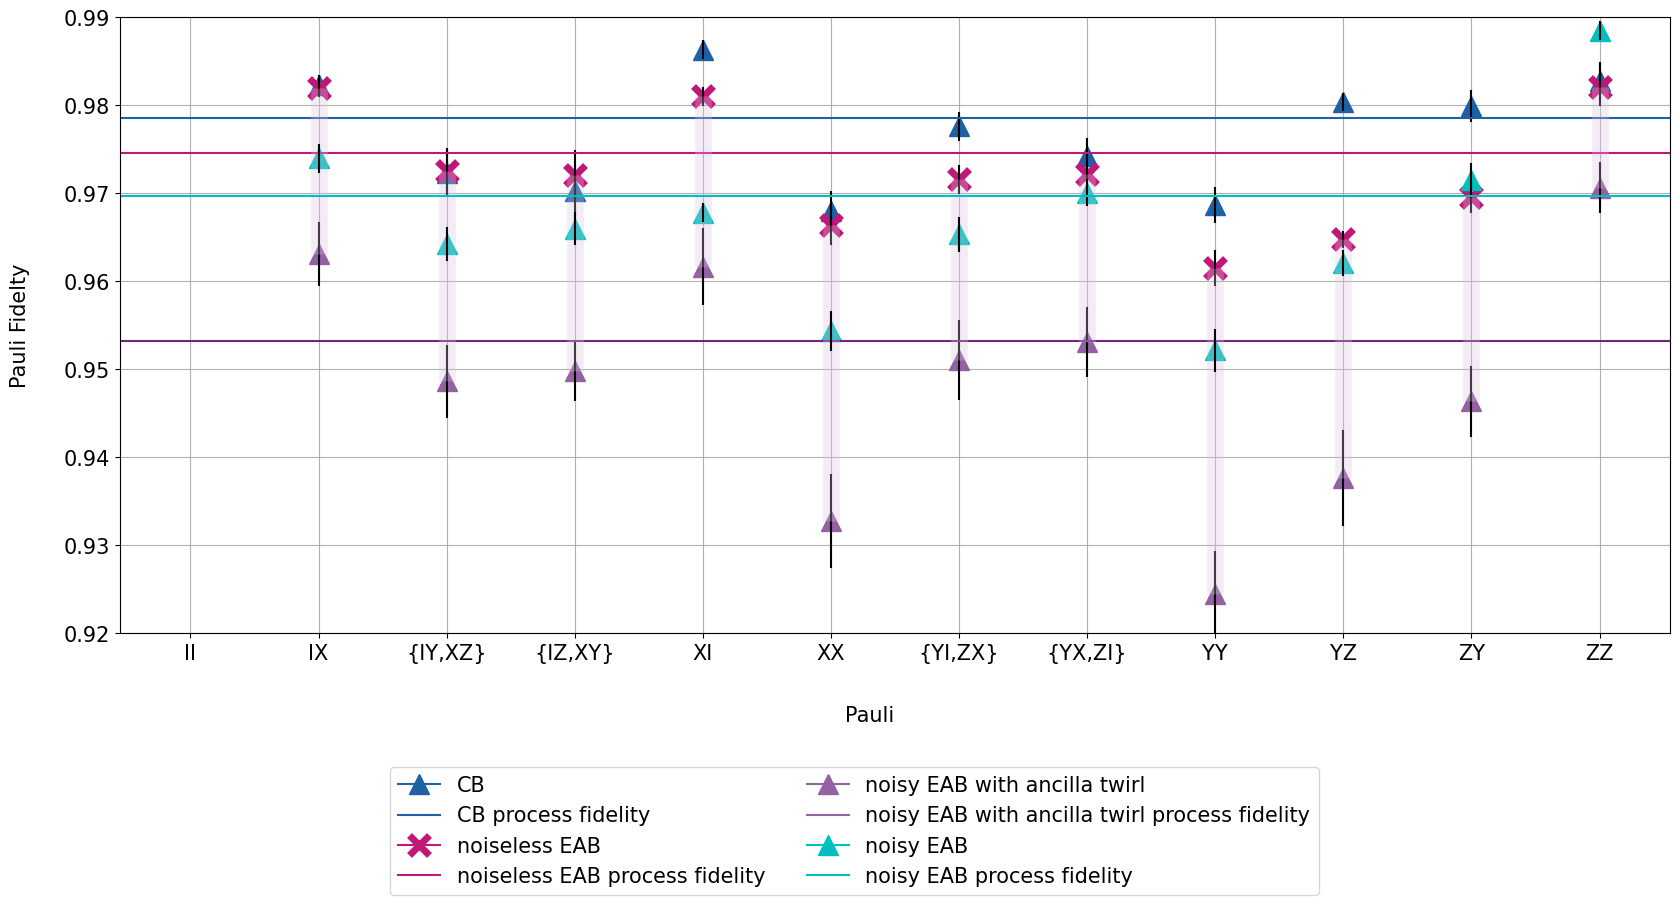

In [50]:
EAB_avg_fidelity=get_avg_fidelity(EAB_plot_dic)
CB_avg_fidelity=get_avg_fidelity(CB_plot_dic)
EAB2_avg_fidelity=get_avg_fidelity(EAB2_plot_dic)
EAB3_avg_fidelity=get_avg_fidelity(EAB3_plot_dic)
EAB4_avg_fidelity=get_avg_fidelity(EAB4_plot_dic)
print(EAB_avg_fidelity)

fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.07, 0.5, 'Pauli Fidelty ', va='center', rotation='vertical')
# plt.rcParams.update({'font.size': 20})

print(len(list(EAB_plot_dic.keys())))
print (type([EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())]))
xlist=range(16)
xlabellist=list(EAB_plot_dic.keys())
ylist=[EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())]
#CB
plt.errorbar(list(CB_plot_dic.keys()),[CB_plot_dic[pauli_label] for pauli_label in list(CB_plot_dic.keys())],yerr=[CB_plot_errorbar_dic[pauli_label] for pauli_label in list(CB_plot_errorbar_dic.keys())],marker="^",ecolor="k",ls="",color=pal2[9],markersize=15,barsabove=True,label='FTXX45 CB ')
plt.axhline(y = CB_avg_fidelity, color = pal2[9], linestyle = '-',label="CB avg") 

# plt.errorbar(xlist,ylist,color=pal1[0],markersize=15,label='FTXX45 EAB new solution ')
plt.errorbar(list(EAB_plot_dic.keys()),[EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())],yerr=[EAB_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB_plot_errorbar_dic.keys())],marker="x",mew=5,ls="",color=pal1[0],ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB mitigated ')
plt.axhline(y = EAB_avg_fidelity, color = pal1[0], linestyle = '-',label="EAB avg") 

#0919EAB XX anc twirl
plt.errorbar(list(EAB4_plot_dic.keys()),[EAB4_plot_dic[pauli_label] for pauli_label in list(EAB4_plot_dic.keys())],yerr=[EAB4_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB4_plot_errorbar_dic.keys())],marker="^",ls="",color=pal[1],ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB mitigated ')
plt.axhline(y = EAB4_avg_fidelity, color = pal[0], linestyle = '-',label="EAB4 avg") 

plt.vlines(list(EAB3_plot_dic.keys()),[EAB4_plot_dic[pauli_label] for pauli_label in list(EAB4_plot_dic.keys())], \
         [EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())], colors=pal[3],alpha=0.3,linewidth=12.0)

# normal EAB 10012024
# plt.errorbar(list(EAB2_plot_dic.keys()),[EAB2_plot_dic[pauli_label] for pauli_label in list(EAB2_plot_dic.keys())],yerr=[EAB2_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB2_plot_errorbar_dic.keys())],marker="^",ecolor="k",ls="",color=pal[1],markersize=15,barsabove=True,label='FTXX45 EAB normal 10012024')
# plt.axhline(y = EAB2_avg_fidelity, color = pal[1], linestyle = '-',label="EAB normal avg") 

#1001 EAB with rerun 
plt.errorbar(list(EAB3_plot_dic.keys()),[EAB3_plot_dic[pauli_label] for pauli_label in list(EAB3_plot_dic.keys())],yerr=[EAB3_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB3_plot_errorbar_dic.keys())],marker="^",ls="",color="c",ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB normal 10012024 with rerun')
plt.axhline(y = EAB3_avg_fidelity, color = "c", linestyle = '-',label="EAB avg") 


plt.ylim([0.92,0.99])
plt.grid(axis="both")
# plt.title("Pauli Fidelities")
legend_elements = [
                   Line2D([0], [0], marker='^', color=pal2[9], label='CB',markerfacecolor=pal2[9], markersize=15),
                   Line2D([0], [0], color=pal2[9], label='CB process fidelity'),
                   Line2D([0], [0], marker='x', mew=5,color=pal1[0], label='noiseless EAB',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], color=pal1[0], label='noiseless EAB process fidelity'),
                   Line2D([0], [0], marker='^', color=pal[1], label='noisy EAB with ancilla twirl',markerfacecolor=pal[1], markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], color=pal[1], label='noisy EAB with ancilla twirl process fidelity'),
                   
                #    Line2D([0], [0], marker='^', color=pal[1], label='EAB normal 10012024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15), # 0305 new solution middle ion idle
                #    Line2D([0], [0], color=pal[1], label='EAB normal process fidelity'),
                   Line2D([0], [0], marker='^', color="c", label='noisy EAB',markerfacecolor="c", markersize=15), # 0305 new solution middle ion idle
                   Line2D([0], [0], color="c", label='noisy EAB process fidelity'),
                  ]
plt.legend(bbox_to_anchor=(0.5, 0.5))

plt.legend(handles=legend_elements,ncol=2,fontsize=15,bbox_to_anchor=(0.78,-0.2))

0.9746538121511855
12
<class 'list'>


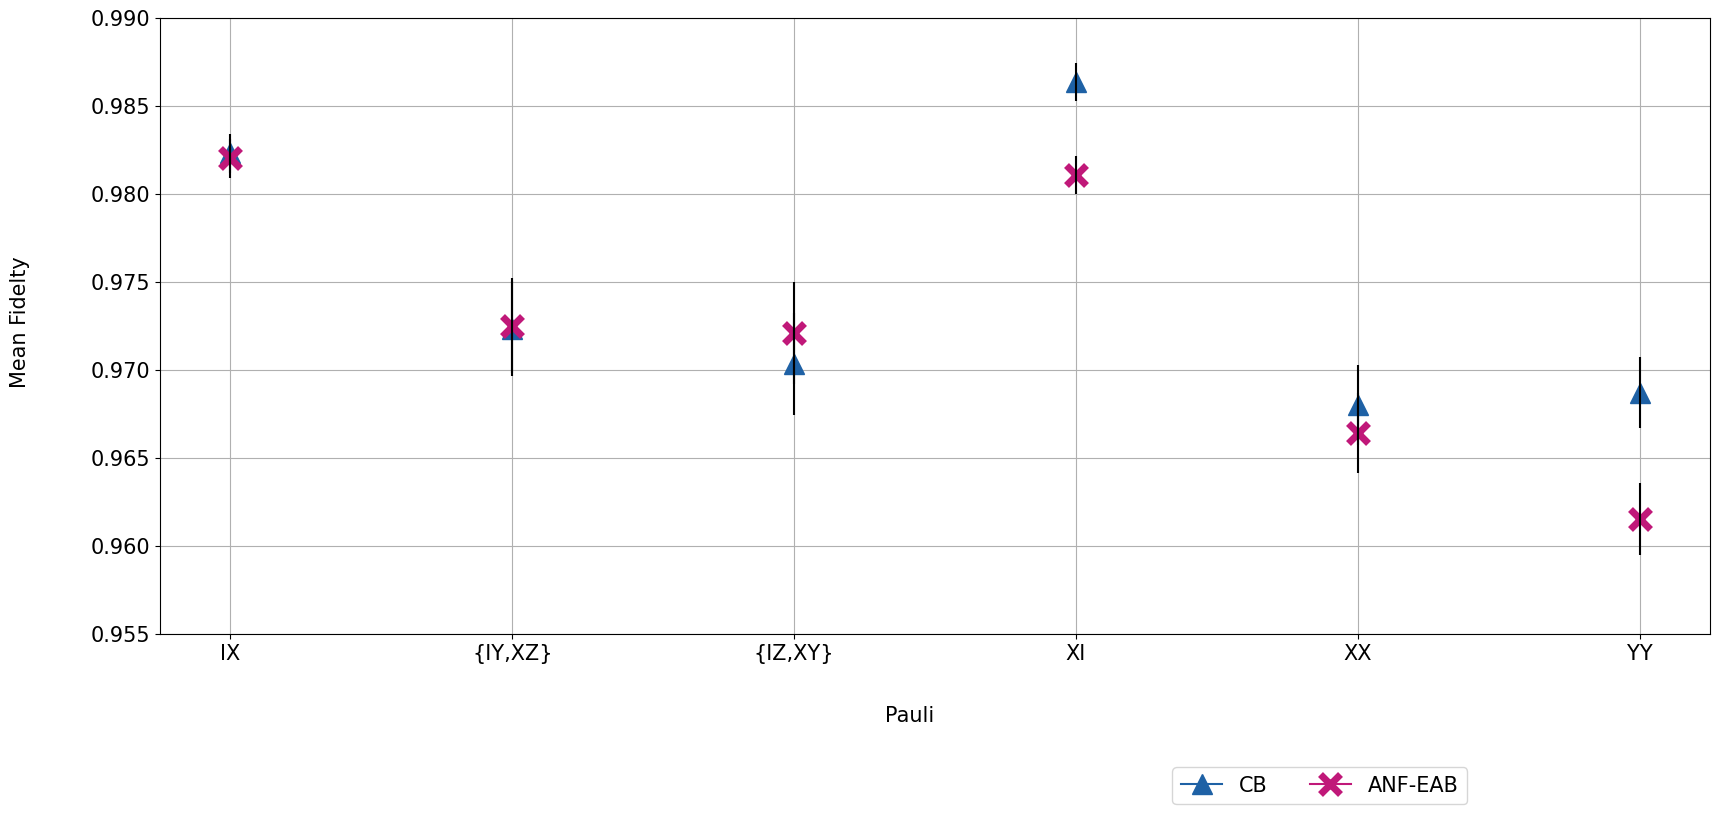

In [58]:
EAB_avg_fidelity=get_avg_fidelity(EAB_plot_dic)
CB_avg_fidelity=get_avg_fidelity(CB_plot_dic)
EAB2_avg_fidelity=get_avg_fidelity(EAB2_plot_dic)
EAB3_avg_fidelity=get_avg_fidelity(EAB3_plot_dic)
EAB4_avg_fidelity=get_avg_fidelity(EAB4_plot_dic)
print(EAB_avg_fidelity)
CB_label_list=["IX","{IY,XZ}","{IZ,XY}","XI","XX","YY"]
CB_plot_dic_select={}
CB_plot_errorbar_dic_select={}
for Pauli_label in list(CB_plot_dic.keys()):
    if Pauli_label in CB_label_list:
        CB_plot_dic_select[Pauli_label]=CB_plot_dic[Pauli_label]
        CB_plot_errorbar_dic_select[Pauli_label]=CB_plot_errorbar_dic[Pauli_label]

fig=plt.figure(figsize=(20, 8))
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
plt.rcParams.update({'font.size': 15})
fig.text(0.5, 0.0, 'Pauli', ha='center')
fig.text(0.05, 0.5, 'Mean Fidelty', va='center', rotation='vertical')
# plt.rcParams.update({'font.size': 20})

print(len(list(EAB_plot_dic.keys())))
print (type([EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())]))
xlist=range(16)
xlabellist=list(EAB_plot_dic.keys())
ylist=[EAB_plot_dic[pauli_label] for pauli_label in list(EAB_plot_dic.keys())]
#CB
plt.errorbar(CB_label_list,[CB_plot_dic[pauli_label] for pauli_label in CB_label_list],yerr=[CB_plot_errorbar_dic[pauli_label] for pauli_label in CB_label_list],marker="^",ecolor="k",ls="",color=pal2[9],markersize=15,barsabove=True,label='FTXX45 CB ')
# plt.axhline(y = CB_avg_fidelity, color = pal2[9], linestyle = '-',label="CB avg") 

# plt.errorbar(xlist,ylist,color=pal1[0],markersize=15,label='FTXX45 EAB new solution ')
plt.errorbar(CB_label_list,[EAB_plot_dic[pauli_label] for pauli_label in CB_label_list],yerr=[EAB_plot_errorbar_dic[pauli_label] for pauli_label in CB_label_list],marker="x",mew=5,ls="",color=pal1[0],ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB mitigated ')
# plt.axhline(y = EAB_avg_fidelity, color = pal1[0], linestyle = '-',label="EAB avg") 

#0919EAB XX anc twirl
# plt.errorbar(CB_label_list,[EAB4_plot_dic[pauli_label] for pauli_label in CB_label_list],yerr=[EAB4_plot_errorbar_dic[pauli_label] for pauli_label in CB_label_list],marker="^",ls="",color=pal[1],ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB mitigated ')
# plt.axhline(y = EAB4_avg_fidelity, color = pal[0], linestyle = '-',label="EAB4 avg") 

# plt.vlines(CB_label_list,[EAB4_plot_dic[pauli_label] for pauli_label in CB_label_list], \
        #  [EAB_plot_dic[pauli_label] for pauli_label in CB_label_list], colors=pal[3],alpha=0.3,linewidth=12.0)

# normal EAB 10012024
# plt.errorbar(list(EAB2_plot_dic.keys()),[EAB2_plot_dic[pauli_label] for pauli_label in list(EAB2_plot_dic.keys())],yerr=[EAB2_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB2_plot_errorbar_dic.keys())],marker="^",ecolor="k",ls="",color=pal[1],markersize=15,barsabove=True,label='FTXX45 EAB normal 10012024')
# plt.axhline(y = EAB2_avg_fidelity, color = pal[1], linestyle = '-',label="EAB normal avg") 

#1001 EAB with rerun 
# plt.errorbar(list(EAB3_plot_dic.keys()),[EAB3_plot_dic[pauli_label] for pauli_label in list(EAB3_plot_dic.keys())],yerr=[EAB3_plot_errorbar_dic[pauli_label] for pauli_label in list(EAB3_plot_errorbar_dic.keys())],marker="^",ls="",color="c",ecolor="k",markersize=15,barsabove=True,label='FTXX45 EAB normal 10012024 with rerun')
# plt.axhline(y = EAB3_avg_fidelity, color = "c", linestyle = '-',label="EAB avg") 


plt.ylim([0.955,0.99])
plt.grid(axis="both")
# plt.title("Pauli Fidelities")
legend_elements = [
                   Line2D([0], [0], marker='^', color=pal2[9], label='CB',markerfacecolor=pal2[9], markersize=15),
                  #  Line2D([0], [0], color=pal2[9], label='CB process fidelity'),
                   Line2D([0], [0], marker='x', mew=5,color=pal1[0], label='ANF-EAB',markerfacecolor=pal1[0], markersize=15), # 0305 new solution middle ion idle
                  #  Line2D([0], [0], color=pal1[0], label='noiseless EAB process fidelity'),
                  #  Line2D([0], [0], marker='^', color=pal[1], label='noisy EAB with ancilla twirl',markerfacecolor=pal[1], markersize=15), # 0305 new solution middle ion idle
                  #  Line2D([0], [0], color=pal[1], label='noisy EAB with ancilla twirl process fidelity'),
                   
                #    Line2D([0], [0], marker='^', color=pal[1], label='EAB normal 10012024 [2,8,16,32]',markerfacecolor=pal[1], markersize=15), # 0305 new solution middle ion idle
                #    Line2D([0], [0], color=pal[1], label='EAB normal process fidelity'),
                #    Line2D([0], [0], marker='^', color="c", label='EAB no anc twirl',markerfacecolor="c", markersize=15), # 0305 new solution middle ion idle
                #    Line2D([0], [0], color="c", label='EAB no anc twirl process fidelity'),
                  ]
plt.legend(bbox_to_anchor=(0.5, 0.5))

plt.legend(handles=legend_elements,fontsize=15)
plt.legend(handles=legend_elements,ncol=3,fontsize=15,bbox_to_anchor=(0.85,-0.2))